In [76]:
import os
import csv
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models, transforms, datasets
from PIL import Image

## chap2

In [2]:
alexnet = models.AlexNet()

In [3]:
alexnet = models.alexnet(pretrained=True)
resnet = models.resnet101(pretrained=True)

In [4]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [7]:
img = Image.open('./data/bobby.jpg')
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [8]:
alexnet.eval()
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
with open('./data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
labels[:10]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus']

In [10]:
out_resnet = resnet(batch_t)
out_alexnet = alexnet(batch_t)

_, index = torch.max(out_resnet, 1)
print(index)

percentage = torch.nn.functional.softmax(out_resnet, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]])

tensor([207])
golden retriever tensor(96.5719, grad_fn=<SelectBackward0>)


In [13]:
_, indices = torch.sort(out_resnet, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.57185363769531),
 ('Labrador retriever', 2.6082682609558105),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2699621915817261),
 ('redbone', 0.1795903742313385),
 ('tennis ball', 0.10991999506950378)]

In [14]:
def read_img(img_name):
    img = Image.open('./data/' + img_name + '.jpg')
    return img

img_names = ['tree', 'sunflower', 'rice', 'mountain', 'kinkakuji', 'house', 'fish', 'chair', 'car']
for name in img_names:
    img = read_img(name)
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = resnet(batch_t)
    
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print(f'正解: {name} | 予測: {labels[index[0]]} | 確率: {percentage[index[0]]}')

正解: tree | 予測: golf ball | 確率: 38.833919525146484
正解: sunflower | 予測: daisy | 確率: 92.87775421142578
正解: rice | 予測: mashed potato | 確率: 85.13230895996094
正解: mountain | 予測: valley, vale | 確率: 45.674869537353516
正解: kinkakuji | 予測: boathouse | 確率: 52.76149368286133
正解: house | 予測: mobile home, manufactured home | 確率: 90.3819580078125
正解: fish | 予測: barracouta, snoek | 確率: 94.6546401977539
正解: chair | 予測: rocking chair, rocker | 確率: 36.943153381347656
正解: car | 予測: sports car, sport car | 確率: 55.28123474121094


## chap3

In [15]:
a = torch.ones(3)
print(a)
print(a[1])
print(float(a[1]))

tensor([1., 1., 1.])
tensor(1.)
1.0


In [16]:
a[2] = 2.0
print(a)

tensor([1., 1., 2.])


In [17]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points.shape)

print(points)

print(points[1, 0])
print(points[1:])
print(points[1:, 0])
print(points[None], points[None].shape)

torch.Size([3, 2])
tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor(5.)
tensor([[5., 3.],
        [2., 1.]])
tensor([5., 2.])
tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]]) torch.Size([1, 3, 2])


In [18]:
img_t = torch.randn(3,5,5)
weights = torch.tensor([0.2126, 0.7152, 0.0722])

batch_t = torch.randn(2,3,5,5)

In [19]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

In [20]:
weights[..., None, None].shape

torch.Size([3, 1, 1])

In [21]:
unsqueezed_weights = weights[..., None, None]
img_weights = img_t * unsqueezed_weights
batch_weights = batch_t * unsqueezed_weights
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

In [22]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

/tmp/ipykernel_1966325/2371314847.py:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1463.)
  weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [23]:
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print('img named:', img_named.shape, img_named.names)
print('batch named:', batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


In [24]:
weights_aligned = weights_named.align_as(img_named)
weights_aligned.shape, weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [25]:
gray_named = (weights_aligned * img_named).sum('channels')
gray_named.shape, gray_named.names

(torch.Size([5, 5]), ('rows', 'columns'))

In [26]:
gray_plain = gray_named.rename(None)
gray_plain.shape, gray_plain.names

(torch.Size([5, 5]), (None, None))

In [27]:
double_points = torch.ones(10, 2, dtype=torch.float64)
short_points = torch.tensor([[1,2], [3,4]], dtype=torch.int16)

In [28]:
double_points = torch.ones(10, 2).double()
short_points = torch.tensor([[1,2], [3,4]]).short()

In [29]:
double_points = torch.ones(10, 2).to(torch.float64)
short_points = torch.tensor([[1,2], [3,4]]).to(torch.int16)

In [30]:
points_64 = torch.rand(5, dtype=torch.float64)
points_short = points_64.to(torch.int16)
points_64 * points_short

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [31]:
a = torch.ones(3,2)
a_t = torch.transpose(a,0,1)
a_t2 = a.transpose(0, 1)
a.shape, a_t.shape, a_t2.shape

(torch.Size([3, 2]), torch.Size([2, 3]), torch.Size([2, 3]))

In [32]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [33]:
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [34]:
a = torch.ones(3,2)
print(a)
a.zero_()
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [35]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point.storage_offset(), second_point.stride(), second_point.size()

(2, (1,), torch.Size([2]))

In [36]:
points.stride()

(2, 1)

In [37]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
# second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[ 4.,  1.],
        [10.,  3.],
        [ 2.,  1.]])

In [38]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
print(points)
print(points_t)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor([[4., 5., 2.],
        [1., 3., 1.]])


In [39]:
id(points.storage()) == id(points_t.storage())

False

In [42]:
points.stride(), points_t.stride()

((2, 1), (1, 2))

In [43]:
some_t = torch.ones(3,4,5)
transpose_t = some_t.transpose(0,2)
some_t.shape, transpose_t.shape

(torch.Size([3, 4, 5]), torch.Size([5, 4, 3]))

In [44]:
some_t.stride(), transpose_t.stride()
# (20, 5, 1), (1, 5, 20)

((20, 5, 1), (1, 5, 20))

In [45]:
points.is_contiguous()

True

In [46]:
points_t.is_contiguous()

False

In [47]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
print(points_t, points_t.stride())

points_t_cont = points_t.contiguous()
print(points_t_cont, points_t_cont.stride())

tensor([[4., 5., 2.],
        [1., 3., 1.]]) (1, 2)
tensor([[4., 5., 2.],
        [1., 3., 1.]]) (3, 1)


In [48]:
points_t.storage(), points_t_cont.storage()

( 4.0
  1.0
  5.0
  3.0
  2.0
  1.0
 [torch.FloatStorage of size 6],
  4.0
  5.0
  2.0
  1.0
  3.0
  1.0
 [torch.FloatStorage of size 6])

In [49]:
points = torch.ones(3,4)
points_np = points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [50]:
points_np[0,0] = 100
print(points_np)
print(points)

[[100.   1.   1.   1.]
 [  1.   1.   1.   1.]
 [  1.   1.   1.   1.]]
tensor([[100.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.]])


In [51]:
points = torch.from_numpy(points_np)
points, points.dtype

(tensor([[100.,   1.,   1.,   1.],
         [  1.,   1.,   1.,   1.],
         [  1.,   1.,   1.,   1.]]),
 torch.float32)

In [52]:
torch.save(points, './data/ourpoints.t')

In [53]:
points = torch.load('./data/ourpoints.t')

In [54]:
a = list(range(9))
a_t = torch.tensor(a)
print(a_t.storage())
print(a_t.size(), a_t.storage_offset(), a_t.stride())

 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.LongStorage of size 9]
torch.Size([9]) 0 (1,)


In [56]:
b = a_t.view(3,3)
print(b.storage())
print(b.size(), b.storage_offset(), b.stride())

b[0,0] = 10
print(a_t)

 10
 1
 2
 3
 4
 5
 6
 7
 8
[torch.LongStorage of size 9]
torch.Size([3, 3]) 0 (3, 1)
tensor([10,  1,  2,  3,  4,  5,  6,  7,  8])


In [57]:
c = b[1:, 1:]
print(c.size(), c.storage_offset(), c.stride())

torch.Size([2, 2]) 4 (3, 1)


In [58]:
print(torch.cos(a_t), torch.cos(a_t).dtype)
print(torch.sqrt(a_t), torch.cos(a_t).dtype)

tensor([-0.8391,  0.5403, -0.4161, -0.9900, -0.6536,  0.2837,  0.9602,  0.7539,
        -0.1455]) torch.float32
tensor([3.1623, 1.0000, 1.4142, 1.7321, 2.0000, 2.2361, 2.4495, 2.6458, 2.8284]) torch.float32


## chap4

In [59]:
import imageio.v2 as imageio

img_arr = imageio.imread('./data/bobby.jpg')
img_arr.shape

(720, 1280, 3)

In [60]:
img = torch.from_numpy(img_arr)
out = img.permute(2,0,1)
out.shape

torch.Size([3, 720, 1280])

In [61]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch.shape

torch.Size([3, 3, 256, 256])

In [66]:
import os

data_dir = './data/image-cats/'
filenames = [n for n in os.listdir(data_dir)]
for i, fname in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, fname))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2,0,1)
    print(img_t.shape)
    img_t = img_t[:3]
    batch[i] = img_t

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


In [67]:
batch = batch.to(torch.float32)
# batch /= 255.0

n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [68]:
dir_path = './data/volumetric-dicom/'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0  Warning: missing file after '/home/itsukimatsunaga/dl_env/nexco/pytorch/data/volumetric-dicom/000062.dcm'
Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 61/98  (62.298/98  (100.0%)


(98, 512, 512)

In [69]:
vol = torch.from_numpy(vol_arr).to(torch.float32)
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 98, 512, 512])

In [70]:
import numpy as np
wine_path = './data/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [71]:
import csv
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, len(col_list), col_list

((4898, 12),
 12,
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [72]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [73]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [74]:
target = wineq[:, -1].to(torch.int64)
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [75]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [76]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [77]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [78]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [79]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [80]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [81]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [82]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [83]:
actual_indexes = target > 5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [84]:
torch.sum(predicted_indexes)

tensor(2727)

In [85]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = predicted_indexes.sum().item()
n_actual = actual_indexes.sum().item()
n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

In [86]:
bikes_numpy = np.loadtxt('./data/bike-sharing-dataset/hour-fixed.csv', dtype=np.float32, delimiter=',', skiprows=1,
                        converters={1: lambda x: float(x[8:10])})
bikes = torch.from_numpy(bikes_numpy)
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [87]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [88]:
daily_bikes = daily_bikes.transpose(1,2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [89]:
first_day = bikes[:24].to(torch.int64)
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:, 9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [90]:
weather_onehot.scatter_(1, first_day[:,9].unsqueeze(1) - 1, 1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [91]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [92]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [93]:
daily_weather_onehot.scatter_(1, daily_bikes[:, 9, :].to(torch.int64).unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [94]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [95]:
daily_bikes.shape

torch.Size([730, 21, 24])

In [96]:
with open('./data/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()
text[:10]

'\ufeffThe Proje'

In [97]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [98]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([70, 128])

In [99]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i, letter_index] = 1

In [100]:
def clean_words(input_str):
    punctuation = '.,;:"!?“”`_-'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [101]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {w: i for i, w in enumerate(word_list)}
len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [102]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i, word_index] = 1
    print(f'{i:2} {word_index:4} {word}')
word_t.shape

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him


torch.Size([11, 7261])

In [103]:
img_arr = imageio.imread('./data/kinkakuji.jpg')
img = torch.from_numpy(img_arr)
img = img.permute(2, 0, 1)
img.shape

torch.Size([3, 340, 508])

In [104]:
img.to(torch.float32).mean()

tensor(127.2639)

In [105]:
n_channels = img.shape[0]

img = img.to(torch.float32)
img_normalized = torch.zeros(img.shape)

mean = img.mean(dim=[1,2])
std = img.std(dim=[1,2])
img_normalized = (img - mean[:, None, None]) / std[:, None, None]
img_normalized

tensor([[[-0.1269, -0.0938, -0.0606,  ...,  0.6199,  0.6033,  0.6033],
         [-0.0772, -0.0606, -0.0108,  ...,  0.6199,  0.6199,  0.6199],
         [-0.0274, -0.0108,  0.0556,  ...,  0.6364,  0.6364,  0.6199],
         ...,
         [-1.1393, -1.2554, -1.3550,  ..., -0.5584, -0.5750, -0.5916],
         [-1.1227, -1.2222, -1.3052,  ..., -0.5418, -0.5584, -0.5750],
         [-1.1891, -1.2554, -1.3052,  ..., -0.4754, -0.4754, -0.5086]],

        [[ 0.6669,  0.6995,  0.7322,  ...,  0.8955,  0.8792,  0.8792],
         [ 0.7159,  0.7322,  0.7812,  ...,  0.8955,  0.8955,  0.8955],
         [ 0.7649,  0.7812,  0.8302,  ...,  0.9118,  0.9118,  0.8955],
         ...,
         [-0.9009, -0.9825, -1.0315,  ..., -0.2150, -0.3130, -0.3293],
         [-0.8846, -0.9499, -0.9825,  ..., -0.1987, -0.2966, -0.3130],
         [-0.9499, -0.9825, -0.9825,  ..., -0.1333, -0.2150, -0.2477]],

        [[ 1.4368,  1.4600,  1.4832,  ...,  1.5759,  1.5643,  1.5643],
         [ 1.4716,  1.4832,  1.5179,  ...,  1

## chap5

In [106]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [107]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [108]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)

loss = loss_fn(t_p, t_c)
t_p, loss

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]),
 tensor(1763.8848))

In [109]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [110]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

learning_rate = 1e-2
b = b - learning_rate * loss_rate_of_change_b

In [111]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [112]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [113]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [114]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(n_epochs):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params -= learning_rate * grad
        
        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Loss {loss}')
            
            if print_params:
                print(f'\tParams: {params}')
                print(f'\tGrad: {grad}')
    return params

In [116]:
training_loop(n_epochs=500, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)

Epoch 0, Loss 1763.884765625
	Params: tensor([ 0.5483, -0.0083])
	Grad: tensor([4517.2964,   82.6000])
Epoch 50, Loss 29.067485809326172
	Params: tensor([ 0.2325, -0.0290])
	Grad: tensor([-0.0533,  3.0252])
Epoch 100, Loss 29.021753311157227
	Params: tensor([ 0.2327, -0.0441])
	Grad: tensor([-0.0532,  3.0225])
Epoch 150, Loss 28.976102828979492
	Params: tensor([ 0.2330, -0.0592])
	Grad: tensor([-0.0532,  3.0199])
Epoch 200, Loss 28.930524826049805
	Params: tensor([ 0.2333, -0.0743])
	Grad: tensor([-0.0532,  3.0172])
Epoch 250, Loss 28.885034561157227
	Params: tensor([ 0.2335, -0.0894])
	Grad: tensor([-0.0532,  3.0146])
Epoch 300, Loss 28.839618682861328
	Params: tensor([ 0.2338, -0.1044])
	Grad: tensor([-0.0530,  3.0120])
Epoch 350, Loss 28.794282913208008
	Params: tensor([ 0.2341, -0.1195])
	Grad: tensor([-0.0529,  3.0093])
Epoch 400, Loss 28.7490291595459
	Params: tensor([ 0.2343, -0.1345])
	Grad: tensor([-0.0530,  3.0067])
Epoch 450, Loss 28.7038516998291
	Params: tensor([ 0.2346, -

tensor([ 0.2348, -0.1643])

In [118]:
t_un = t_u * 0.1
params = training_loop(n_epochs=5000, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_un, t_c=t_c)
print(params)

Epoch 0, Loss 80.36434173583984
	Params: tensor([1.7761, 0.1064])
	Grad: tensor([-77.6140, -10.6400])
Epoch 50, Loss 25.63360023498535
	Params: tensor([ 2.5283, -1.2314])
	Grad: tensor([-0.4832,  2.7351])
Epoch 100, Loss 22.083463668823242
	Params: tensor([ 2.7597, -2.5413])
	Grad: tensor([-0.4438,  2.5122])
Epoch 150, Loss 19.088401794433594
	Params: tensor([ 2.9723, -3.7445])
	Grad: tensor([-0.4076,  2.3075])
Epoch 200, Loss 16.561622619628906
	Params: tensor([ 3.1675, -4.8496])
	Grad: tensor([-0.3744,  2.1194])
Epoch 250, Loss 14.429920196533203
	Params: tensor([ 3.3468, -5.8647])
	Grad: tensor([-0.3439,  1.9467])
Epoch 300, Loss 12.63150691986084
	Params: tensor([ 3.5115, -6.7970])
	Grad: tensor([-0.3159,  1.7881])
Epoch 350, Loss 11.11428165435791
	Params: tensor([ 3.6628, -7.6534])
	Grad: tensor([-0.2901,  1.6423])
Epoch 400, Loss 9.834277153015137
	Params: tensor([ 3.8017, -8.4399])
	Grad: tensor([-0.2665,  1.5085])
Epoch 450, Loss 8.75440502166748
	Params: tensor([ 3.9293, -9.1

In [119]:
import matplotlib.pyplot as plt

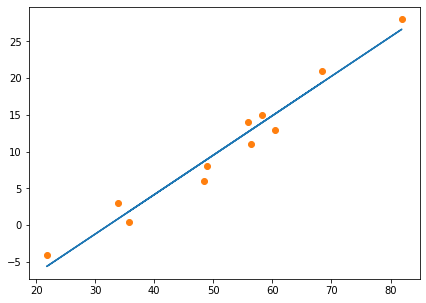

In [120]:
t_p = model(t_un, *params)

fig = plt.figure(figsize=(7,5))
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

In [121]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
print(params.grad)

None


In [122]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
print(params.grad)

tensor([4517.2969,   82.6000])


In [123]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss}')
    return params

In [124]:
training_loop(5000, 1e-2, torch.tensor([1.0, 0.0], requires_grad=True), t_un, t_c)

Epoch 500, Loss 7.860115051269531
Epoch 1000, Loss 3.828537940979004
Epoch 1500, Loss 3.092191219329834
Epoch 2000, Loss 2.957697868347168
Epoch 2500, Loss 2.933133840560913
Epoch 3000, Loss 2.9286484718322754
Epoch 3500, Loss 2.9278297424316406
Epoch 4000, Loss 2.9276793003082275
Epoch 4500, Loss 2.927651882171631
Epoch 5000, Loss 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [125]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [126]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [127]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss}')
    return params

In [128]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(5000, optimizer, params, t_un, t_c)

Epoch 500, Loss 7.860119819641113
Epoch 1000, Loss 3.828537940979004
Epoch 1500, Loss 3.092191219329834
Epoch 2000, Loss 2.957697868347168
Epoch 2500, Loss 2.933133840560913
Epoch 3000, Loss 2.9286484718322754
Epoch 3500, Loss 2.9278297424316406
Epoch 4000, Loss 2.9276793003082275
Epoch 4500, Loss 2.927651882171631
Epoch 5000, Loss 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [129]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(2000, optimizer, params, t_u, t_c)

Epoch 500, Loss 7.612900257110596
Epoch 1000, Loss 3.086700439453125
Epoch 1500, Loss 2.928579092025757
Epoch 2000, Loss 2.9276442527770996


tensor([  0.5367, -17.3021], requires_grad=True)

In [130]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([9, 1, 7, 5, 2, 8, 0, 3, 6]), tensor([10,  4]))

In [131]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [132]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch {epoch}, Train Loss {train_loss}, Valid Loss {val_loss}')
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(3000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)

Epoch 1, Train Loss 72.74058532714844, Valid Loss 114.67124938964844
Epoch 2, Train Loss 40.26822280883789, Valid Loss 46.45689392089844
Epoch 3, Train Loss 33.95819854736328, Valid Loss 27.988441467285156
Epoch 500, Train Loss 7.064545631408691, Valid Loss 6.850964546203613
Epoch 1000, Train Loss 3.461113452911377, Valid Loss 4.285747528076172
Epoch 1500, Train Loss 2.9574294090270996, Valid Loss 3.583232879638672
Epoch 2000, Train Loss 2.887024164199829, Valid Loss 3.3564412593841553
Epoch 2500, Train Loss 2.8771846294403076, Valid Loss 3.2766647338867188
Epoch 3000, Train Loss 2.875810146331787, Valid Loss 3.2475385665893555


tensor([  5.2908, -16.8837], requires_grad=True)

In [133]:
def model(t_u, w1, w2, b):
    out = w2 * t_u**2 + w1 * t_u + b
    return out

In [147]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [148]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(3000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)

Epoch 1, Train Loss 522.655029296875, Valid Loss 1364.9212646484375
Epoch 2, Train Loss 281.97039794921875, Valid Loss 937.6859130859375
Epoch 3, Train Loss 154.8837127685547, Valid Loss 352.75677490234375
Epoch 500, Train Loss 3.771509885787964, Valid Loss 5.625340461730957
Epoch 1000, Train Loss 2.6331634521484375, Valid Loss 13.870804786682129
Epoch 1500, Train Loss 2.4857046604156494, Valid Loss 18.212736129760742
Epoch 2000, Train Loss 2.4607081413269043, Valid Loss 19.81005096435547
Epoch 2500, Train Loss 2.4509365558624268, Valid Loss 20.2785701751709
Epoch 3000, Train Loss 2.443145513534546, Valid Loss 20.332889556884766


tensor([-1.7729,  0.7522, -1.7023], requires_grad=True)

## chap6

In [4]:
linear_model = nn.Linear(1, 1)

In [5]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[-0.8909]], requires_grad=True),
 Parameter containing:
 tensor([-0.9789], requires_grad=True))

In [6]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698],
        [-1.8698]], grad_fn=<AddmmBackward0>)

In [7]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u_train = t_u[:-2]
t_u_val = t_u[-2:]
t_c_train = t_c[:-2]
t_c_val = t_c[-2:]

t_un_train = t_u_train * 0.1
t_un_val = t_u_val * 0.1

In [8]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Train Loss {loss_train.item():.4f}, Valid Loss {loss_val.item():.4f}')
    return

In [11]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs=3000, optimizer=optimizer, model=linear_model, loss_fn=nn.MSELoss(),
             t_u_train=t_un_train, t_u_val=t_un_val, t_c_train=t_c_train, t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Train Loss 117.7138, Valid Loss 219.9299
Epoch 1000, Train Loss 3.4914, Valid Loss 4.2812
Epoch 2000, Train Loss 2.8086, Valid Loss 3.6225
Epoch 3000, Train Loss 2.7947, Valid Loss 3.5618

Parameter containing:
tensor([[5.3300]], requires_grad=True)
Parameter containing:
tensor([-17.0562], requires_grad=True)


In [12]:
seq_model = nn.Sequential(
    nn.Linear(1, 8),
    nn.Tanh(),
    nn.Linear(8, 1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [13]:
[(name, param.shape) for (name, param) in seq_model.named_parameters()]

[('0.weight', torch.Size([8, 1])),
 ('0.bias', torch.Size([8])),
 ('2.weight', torch.Size([1, 8])),
 ('2.bias', torch.Size([1]))]

In [14]:
seq_model = nn.Sequential(
    nn.Linear(1, 8),
    nn.Tanh(),
    nn.Linear(8, 1)
)
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(5000, optimizer, seq_model, nn.MSELoss(), t_un_train, t_un_val, t_c_train, t_c_val)

Epoch 1, Train Loss 157.3855, Valid Loss 297.6735
Epoch 1000, Train Loss 6.6515, Valid Loss 5.5441
Epoch 2000, Train Loss 4.3776, Valid Loss 9.9873
Epoch 3000, Train Loss 2.0354, Valid Loss 6.2289
Epoch 4000, Train Loss 1.6783, Valid Loss 4.0824
Epoch 5000, Train Loss 1.6108, Valid Loss 4.1078


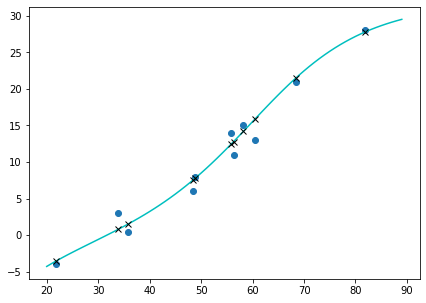

In [15]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(figsize=(7,5))

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Train Loss 160.8759, Valid Loss 304.1570
Epoch 1000, Train Loss 2.8623, Valid Loss 3.6564
Epoch 2000, Train Loss 2.1827, Valid Loss 3.0945
Epoch 3000, Train Loss 1.9842, Valid Loss 2.8355
Epoch 4000, Train Loss 1.9049, Valid Loss 2.6966
Epoch 5000, Train Loss 1.8667, Valid Loss 2.6294


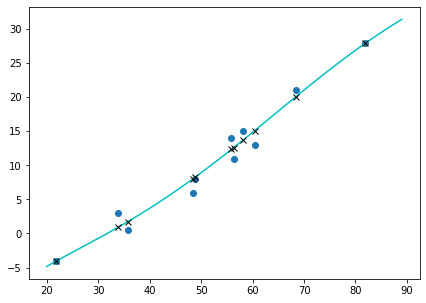

In [16]:
hidden_features = 100
lr = 1e-3
loss_fn = nn.MSELoss()

seq_model = nn.Sequential(
    nn.Linear(1, hidden_features),
    nn.Tanh(),
    nn.Linear(hidden_features, 1)
)
optimizer = optim.SGD(seq_model.parameters(), lr)
training_loop(5000, optimizer, seq_model, loss_fn, t_un_train, t_un_val, t_c_train, t_c_val)

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(figsize=(7,5))

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.show()

In [17]:
wine_path = './data/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq = torch.from_numpy(wineq_numpy)
wineq.shape

torch.Size([4898, 12])

In [18]:
data = wineq[:, :-1]
target = wineq[:, -1]

val_index = int(0.2 * data.shape[0])

X_train = data[:-val_index]
X_val = data[-val_index:]
y_train = target[:-val_index, None]
y_val = target[-val_index:, None]

In [19]:
hidden_size = 100
lr = 1e-2
n_epochs = 5000
loss_fn = nn.MSELoss()

seq_model = nn.Sequential(
    nn.Linear(11, hidden_size),
    nn.Tanh(),
    nn.Linear(hidden_size, 1)
)
optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(n_epochs, optimizer, seq_model, loss_fn, X_train, X_val, y_train, y_val)

Epoch 1, Train Loss 32.5154, Valid Loss 32.2313
Epoch 1000, Train Loss 1.0709, Valid Loss 0.9201
Epoch 2000, Train Loss 1.0906, Valid Loss 0.9696
Epoch 3000, Train Loss 0.9933, Valid Loss 0.8959
Epoch 4000, Train Loss 0.9552, Valid Loss 0.8779
Epoch 5000, Train Loss 0.9098, Valid Loss 0.8416


In [22]:
X_train_n = (X_train - X_train.mean(dim=0)) / X_train.std(dim=0)
X_val_n = (X_val - X_val.mean(dim=0)) / X_val.std(dim=0)

In [23]:
hidden_size = 100
lr = 1e-2
n_epochs = 10000
loss_fn = nn.MSELoss()

seq_model = nn.Sequential(
    nn.Linear(11, hidden_size),
    nn.Tanh(),
    nn.Linear(hidden_size, 1)
)
optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(n_epochs, optimizer, seq_model, loss_fn, X_train_n, X_val_n, y_train, y_val)

Epoch 1, Train Loss 35.7665, Valid Loss 35.4352
Epoch 1000, Train Loss 0.5526, Valid Loss 0.4712
Epoch 2000, Train Loss 0.5308, Valid Loss 0.4486
Epoch 3000, Train Loss 0.5190, Valid Loss 0.4395
Epoch 4000, Train Loss 0.5100, Valid Loss 0.4343
Epoch 5000, Train Loss 0.5020, Valid Loss 0.4308
Epoch 6000, Train Loss 0.4945, Valid Loss 0.4281
Epoch 7000, Train Loss 0.4874, Valid Loss 0.4254
Epoch 8000, Train Loss 0.4806, Valid Loss 0.4224
Epoch 9000, Train Loss 0.4743, Valid Loss 0.4194
Epoch 10000, Train Loss 0.4683, Valid Loss 0.4165


In [26]:
X_train_n_cuda = X_train_n.to(device='cuda')
X_val_n_cuda = X_val_n.to(device='cuda')
y_train_cuda = y_train.to(device='cuda')
y_val_cuda = y_val.to(device='cuda')

hidden_size = 100
lr = 1e-2
n_epochs = 10000
loss_fn = nn.MSELoss()

seq_model = nn.Sequential(
    nn.Linear(11, hidden_size),
    nn.Tanh(),
    nn.Linear(hidden_size, 1)
).to(device='cuda')

optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(n_epochs, optimizer, seq_model, loss_fn, X_train_n_cuda, X_val_n_cuda, y_train_cuda, y_val_cuda)

Epoch 1, Train Loss 35.3265, Valid Loss 34.9498
Epoch 1000, Train Loss 0.5603, Valid Loss 0.4928
Epoch 2000, Train Loss 0.5351, Valid Loss 0.4615
Epoch 3000, Train Loss 0.5218, Valid Loss 0.4476
Epoch 4000, Train Loss 0.5122, Valid Loss 0.4382
Epoch 5000, Train Loss 0.5042, Valid Loss 0.4309
Epoch 6000, Train Loss 0.4972, Valid Loss 0.4253
Epoch 7000, Train Loss 0.4909, Valid Loss 0.4212
Epoch 8000, Train Loss 0.4851, Valid Loss 0.4184
Epoch 9000, Train Loss 0.4794, Valid Loss 0.4166
Epoch 10000, Train Loss 0.4738, Valid Loss 0.4156


## chap7

In [27]:
data_path = './data/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [29]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [30]:
class_names = ['plain', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

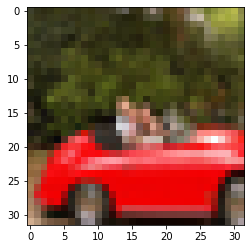

In [31]:
plt.imshow(img)
plt.show()

In [32]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [33]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [34]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=to_tensor)

img_t, _ = tensor_cifar10[99]
type(img_t), img_t.shape, img_t.dtype

(torch.Tensor, torch.Size([3, 32, 32]), torch.float32)

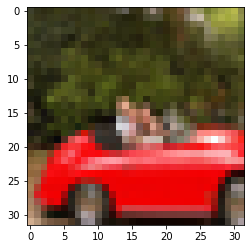

In [35]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [36]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [37]:
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [38]:
transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])

Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.2435, 0.2616])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


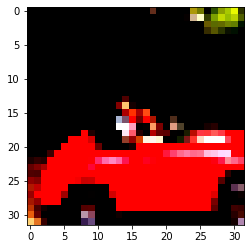

In [39]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], 
            std=[0.2470, 0.2435, 0.2616]
        )
    ])
)

img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [40]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=to_tensor)
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=to_tensor)

cifar2 = [(img, label_map[label]) for img, label in tensor_cifar10 if label in {0, 2}]
cifar2_val = [(img, label_map[label]) for img, label in tensor_cifar10_val if label in {0, 2}]

In [41]:
n_in = 32 * 32 * 3
n_hidden = 512
n_out = 2

model = nn.Sequential(
    nn.Linear(n_in, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_out)
)

In [42]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [43]:
softmax(torch.tensor([1, 2, 3]))

tensor([0.0900, 0.2447, 0.6652])

In [44]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                 [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [45]:
n_in = 32 * 32 * 3
n_hidden = 512
n_out = 2

model = nn.Sequential(
    nn.Linear(n_in, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_out),
    nn.Softmax(dim=1)
)

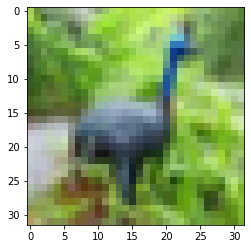

In [46]:
img, _ = cifar2[0]

plt.imshow(img.permute(1,2,0))
plt.show()

In [47]:
img_batch = img.view(-1).unsqueeze(0)
out = model(img_batch)
out

tensor([[0.4513, 0.5487]], grad_fn=<SoftmaxBackward0>)

In [48]:
n_in = 32 * 32 * 3
n_hidden = 512
n_out = 2

model = nn.Sequential(
    nn.Linear(n_in, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_out),
    nn.LogSoftmax(dim=1),
)

loss = nn.NLLLoss()

In [49]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
print(out)
loss(out, torch.tensor([label]))

tensor([[-0.6578, -0.7297]], grad_fn=<LogSoftmaxBackward0>)


tensor(0.7297, grad_fn=<NllLossBackward0>)

In [221]:
n_in = 32 * 32 * 3
n_hidden = 512
n_out = 2
n_epochs = 100
learning_rate = 1e-2

model = nn.Sequential(
    nn.Linear(n_in, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_out),
    nn.LogSoftmax(dim=1),
)

loss_fn = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch}, Loss: {loss}')

Epoch: 0, Loss: 1.1808040142059326
Epoch: 1, Loss: 1.4308264255523682
Epoch: 2, Loss: 1.610068678855896
Epoch: 3, Loss: 2.1465883255004883
Epoch: 4, Loss: 2.566023349761963
Epoch: 5, Loss: 2.632803440093994


KeyboardInterrupt: 

In [50]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [51]:
n_in = 32 * 32 * 3
n_hidden = 512
n_out = 2
n_epochs = 100
batch_size = 64
learning_rate = 1e-2

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = nn.Sequential(
    nn.Linear(n_in, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_out),
    nn.LogSoftmax(dim=1),
)

loss_fn = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch < 3 or (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')

Epoch: 0, Loss: 0.5302911996841431
Epoch: 1, Loss: 0.39758867025375366
Epoch: 2, Loss: 0.5306121706962585
Epoch: 9, Loss: 0.409014493227005
Epoch: 19, Loss: 0.3407643139362335
Epoch: 29, Loss: 0.41072455048561096
Epoch: 39, Loss: 0.38896292448043823
Epoch: 49, Loss: 0.7418482899665833
Epoch: 59, Loss: 0.7585717439651489
Epoch: 69, Loss: 0.16894115507602692
Epoch: 79, Loss: 0.28975367546081543
Epoch: 89, Loss: 0.3528478145599365
Epoch: 99, Loss: 0.17438285052776337


In [52]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print(f'Accuracy: {correct / total}')

Accuracy: 0.832


In [53]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

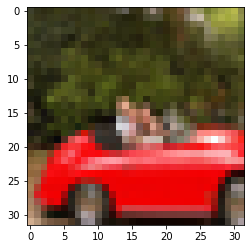

In [54]:
img_t, _ = tensor_cifar10[99]
plt.imshow(img_t.permute(1,2,0))
plt.show()

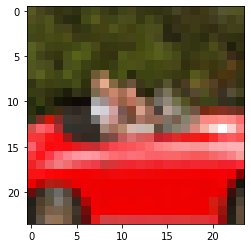

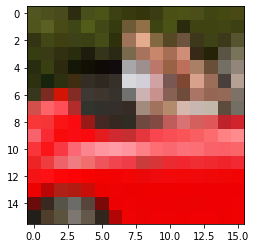

In [55]:
random_crop = transforms.RandomCrop(24)
img_t_cropped = random_crop(img_t)
plt.imshow(img_t_cropped.permute(1,2,0))
plt.show()

random_crop = transforms.RandomCrop(16)
img_t_cropped = random_crop(img_t_cropped)
plt.imshow(img_t_cropped.permute(1,2,0))
plt.show()

In [57]:
crop_size = 24
random_crop = transforms.RandomCrop(crop_size)
cropped_cifar2 = [(random_crop(img), label) for img, label in cifar2]
cropped_cifar2_val = [(random_crop(img), label) for img, label in cifar2_val]

n_in = crop_size**2 * 3
n_hid = 512
n_out = 2
n_epochs = 100
batch_size = 64
lr = 1e-2

train_loader = torch.utils.data.DataLoader(cropped_cifar2, batch_size=batch_size, shuffle=True)

model = nn.Sequential(
    nn.Linear(n_in, n_hid),
    nn.Tanh(),
    nn.Linear(n_hid, n_out),
    nn.LogSoftmax(dim=1),
)
loss_fn = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch < 3 or (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss}')

Epoch: 1, Loss: 0.6930950880050659
Epoch: 2, Loss: 0.5557548999786377
Epoch: 3, Loss: 0.5068772435188293
Epoch: 10, Loss: 0.43348294496536255
Epoch: 20, Loss: 0.4744187593460083
Epoch: 30, Loss: 0.5235295295715332
Epoch: 40, Loss: 0.28145304322242737
Epoch: 50, Loss: 0.693291425704956
Epoch: 60, Loss: 0.28848129510879517
Epoch: 70, Loss: 0.5632581114768982
Epoch: 80, Loss: 0.45908549427986145
Epoch: 90, Loss: 0.37806761264801025
Epoch: 100, Loss: 0.42432868480682373


In [58]:
val_loader = torch.utils.data.DataLoader(cropped_cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
    print(f'Train Accuracy: {correct / total}')    
    
    correct = 0
    total = 0
    
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
    print(f'Valid Accuracy: {correct / total}')

Train Accuracy: 0.7545
Valid Accuracy: 0.738


In [281]:
n_in = 32**2 * 3
n_hid = 512
n_out = 1
n_epochs = 100
batch_size = 64
lr = 1e-3

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = nn.Sequential(
    nn.Linear(n_in, n_hid),
    nn.Tanh(),
    nn.Linear(n_hid, n_out),
    # nn.LogSoftmax(),
)
loss_fn = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outs, labels.unsqueeze(1).to(torch.float32))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch < 3 or (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss}')

Epoch: 1, Loss: 0.1940528303384781
Epoch: 2, Loss: 0.34213417768478394
Epoch: 3, Loss: 0.27166134119033813
Epoch: 10, Loss: 0.16029147803783417
Epoch: 20, Loss: 0.09221005439758301
Epoch: 30, Loss: 0.1900014877319336
Epoch: 40, Loss: 0.07484658807516098
Epoch: 50, Loss: 0.10054468363523483
Epoch: 60, Loss: 0.2856018841266632
Epoch: 70, Loss: 0.22304975986480713
Epoch: 80, Loss: 0.15296676754951477
Epoch: 90, Loss: 0.1537064015865326
Epoch: 100, Loss: 0.16159535944461823


In [282]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

i = 0
total_loss = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outs, labels.unsqueeze(1).to(torch.float32))
        i += 1
        total_loss += loss
        
    print(f'Train Loss: {total_loss / i}')  
    
    i = 0
    total_loss = 0
    
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outs, labels.unsqueeze(1).to(torch.float32))
        i += 1
        total_loss += loss
        
    print(f'Valid Loss: {total_loss / i}')

Train Loss: 0.1430390179157257
Valid Loss: 0.14742465317249298


## chap8

In [59]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [60]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [61]:
img, _ = cifar2[0]
out = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, out.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

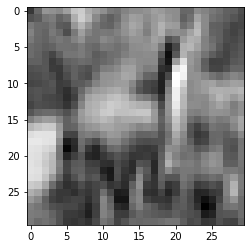

In [62]:
plt.imshow(out[0,0].detach(), cmap='gray')
plt.show()

In [63]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
out = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, out.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [64]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.bias.zero_()
    conv.weight.fill_(1.0 / 9.0)

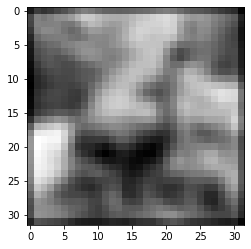

In [65]:
out = conv(img.unsqueeze(0))
plt.imshow(out[0,0].detach(), cmap='gray')
plt.show()

In [66]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                  [-1.0, 0.0, 1.0],
                                  [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

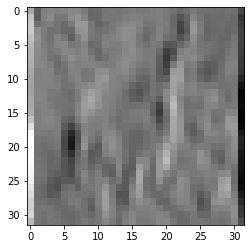

In [67]:
out = conv(img.unsqueeze(0))
plt.imshow(out[0,0].detach(), cmap='gray')
plt.show()

In [68]:
pool = nn.MaxPool2d(2)
out = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, out.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [69]:
ch_in = 3
ch_hid = 16
ch_out = 8

model = nn.Sequential(
    nn.Conv2d(ch_in, ch_hid, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(ch_hid, ch_out, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Linear(ch_out * 8**2, 32),
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [70]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [71]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        ch_in = 3
        ch_hid = 16
        ch_out = 8
        kernel_size = 3
        padding = 1
        pool_size = 2
        
        self.conv1 = nn.Conv2d(ch_in, ch_hid, kernel_size, padding)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(pool_size)
        self.conv2 = nn.Conv2d(ch_hid, ch_out, kernel_size, padding)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(pool_size)
        self.fc1 = nn.Linear(ch_out * 8**2, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8**2)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [72]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [73]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        ch_in = 3
        ch_hid = 16
        ch_out = 8
        kernel_size = 3
        padding = 1
        pool_size = 2
        
        self.conv1 = nn.Conv2d(ch_in, ch_hid, kernel_size=kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(ch_hid, ch_out, kernel_size=kernel_size, padding=padding)
        self.fc1 = nn.Linear(ch_out * 8**2, 32)
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, ch_out * 8**2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [74]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0569, -0.1048]], grad_fn=<AddmmBackward0>)

In [77]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outs = model(imgs)
            loss = loss_fn(outs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        
        if epoch < 3 or epoch % 10 == 0:
            print(f'{dt.datetime.now()} | Epoch: {epoch}, Train Loss: {loss_train / len(train_loader)}')

In [412]:
batch_size = 64
n_epochs = 200
lr = 1e-2

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = Net()
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2022-07-14 03:19:16.189809 | Epoch: 1, Train Loss: 0.6861372703959228
2022-07-14 03:19:17.542952 | Epoch: 2, Train Loss: 0.6603196847970318
2022-07-14 03:19:28.541747 | Epoch: 10, Train Loss: 0.4441832072415929
2022-07-14 03:19:42.055047 | Epoch: 20, Train Loss: 0.3472924507727289
2022-07-14 03:19:55.625593 | Epoch: 30, Train Loss: 0.323551009794709
2022-07-14 03:20:09.157643 | Epoch: 40, Train Loss: 0.30863043219800207
2022-07-14 03:20:22.714602 | Epoch: 50, Train Loss: 0.2963359546699342
2022-07-14 03:20:36.245549 | Epoch: 60, Train Loss: 0.28543475934654283
2022-07-14 03:20:49.817806 | Epoch: 70, Train Loss: 0.2704909002040602
2022-07-14 03:21:03.398350 | Epoch: 80, Train Loss: 0.2579610018403667
2022-07-14 03:21:16.927399 | Epoch: 90, Train Loss: 0.24478637384381263
2022-07-14 03:21:30.482246 | Epoch: 100, Train Loss: 0.23273821478816353
2022-07-14 03:21:44.013853 | Epoch: 110, Train Loss: 0.2197853080026663
2022-07-14 03:21:57.555125 | Epoch: 120, Train Loss: 0.21174285902529005
2

In [415]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=batch_size, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('valid', val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                outs = model(imgs)
                _, predicted = torch.max(outs, dim=1)
                
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
            print(f'{name} Accuracy: {correct / total :.2f}')

validate(model, train_loader, val_loader)

train Accuracy: 0.95
valid Accuracy: 0.89


In [416]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [417]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Training on device {device}')

Training on device cuda


In [129]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    model.train()
    
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outs = model(imgs)
            loss = loss_fn(outs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        
        if epoch < 3 or epoch % 10 == 0:
            print(f'{dt.datetime.now()} | Epoch: {epoch}, Train Loss: {loss_train / len(train_loader)}')
            

def validate(model, train_loader, val_loader):
    model.eval()
    
    for name, loader in [('train', train_loader), ('valid', val_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outs = model(imgs)
                _, predicted = torch.max(outs, dim=1)
                
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
            print(f'{name} Accuracy: {correct / total :.2f}')        

In [80]:
batch_size = 64
n_epochs = 200
lr = 1e-2

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2022-07-14 03:41:54.937987 | Epoch: 1, Train Loss: 0.685769976703984
2022-07-14 03:41:55.331041 | Epoch: 2, Train Loss: 0.6405917690817717
2022-07-14 03:41:58.451795 | Epoch: 10, Train Loss: 0.4372377837919126
2022-07-14 03:42:02.351214 | Epoch: 20, Train Loss: 0.3541004761199283
2022-07-14 03:42:06.260218 | Epoch: 30, Train Loss: 0.3272334884875899
2022-07-14 03:42:10.158135 | Epoch: 40, Train Loss: 0.30322364428240783
2022-07-14 03:42:14.069226 | Epoch: 50, Train Loss: 0.285683736869484
2022-07-14 03:42:17.981563 | Epoch: 60, Train Loss: 0.2711274925690548
2022-07-14 03:42:21.876900 | Epoch: 70, Train Loss: 0.25407145912670026
2022-07-14 03:42:25.762915 | Epoch: 80, Train Loss: 0.23961100995445708
2022-07-14 03:42:29.665468 | Epoch: 90, Train Loss: 0.2295690125245957
2022-07-14 03:42:33.564936 | Epoch: 100, Train Loss: 0.21772119559489997
2022-07-14 03:42:37.465410 | Epoch: 110, Train Loss: 0.20665568697034933
2022-07-14 03:42:41.363959 | Epoch: 120, Train Loss: 0.195251113337696
202

In [87]:
class NetWidth(nn.Module):
    def __init__(self, n_ch1=32, kernel_size=3, padding=1, pool_size=2):
        super().__init__()
        self.n_ch1 = n_ch1
        self.pool_size = pool_size
        
        self.conv1 = nn.Conv2d(3, n_ch1, kernel_size=kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(n_ch1, n_ch1 // 2, kernel_size=kernel_size, padding=padding)
        self.fc1 = nn.Linear((n_ch1 // 2) * 8**2, 32)
        self.fc2 = nn.Linear(32, 2)
    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), self.pool_size)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), self.pool_size)
        out = out.view(-1, (self.n_ch1 // 2) * 8**2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [88]:
sum(p.numel() for p in NetWidth().parameters())

38386

In [89]:
class NetDropout(nn.Module):
    def __init__(self, n_ch1=32):
        super().__init__()
        
        self.n_ch1 = n_ch1
        
        self.conv1 = nn.Conv2d(3, n_ch1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_ch1, n_ch1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear((n_ch1 // 2) * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, (self.n_ch1 // 2) * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [93]:
batch_size = 64
n_epochs = 200
lr = 1e-2

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = NetDropout().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2022-07-14 03:44:57.060500 | Epoch: 1, Train Loss: 0.6722310033573466
2022-07-14 03:44:57.492028 | Epoch: 2, Train Loss: 0.6212449597704942
2022-07-14 03:45:00.954179 | Epoch: 10, Train Loss: 0.4506608486934832
2022-07-14 03:45:05.293731 | Epoch: 20, Train Loss: 0.38283310906522594
2022-07-14 03:45:09.606781 | Epoch: 30, Train Loss: 0.36860802067313225
2022-07-14 03:45:13.944184 | Epoch: 40, Train Loss: 0.3504598479551874
2022-07-14 03:45:18.277701 | Epoch: 50, Train Loss: 0.3362737861788197
2022-07-14 03:45:22.606930 | Epoch: 60, Train Loss: 0.3319413961878248
2022-07-14 03:45:26.927329 | Epoch: 70, Train Loss: 0.3203203349736086
2022-07-14 03:45:31.257631 | Epoch: 80, Train Loss: 0.3101654200322309
2022-07-14 03:45:35.583179 | Epoch: 90, Train Loss: 0.2990454963058423
2022-07-14 03:45:39.911481 | Epoch: 100, Train Loss: 0.28532609305564005
2022-07-14 03:45:44.237610 | Epoch: 110, Train Loss: 0.2861496737808179
2022-07-14 03:45:48.571965 | Epoch: 120, Train Loss: 0.272547483349302
202

In [95]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

validate(model, train_loader, val_loader)

train Accuracy: 0.93
valid Accuracy: 0.89


In [96]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_ch1=32):
        super().__init__()
        
        self.n_ch1 = n_ch1
        
        self.conv1 = nn.Conv2d(3, n_ch1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_ch1)
        self.conv2 = nn.Conv2d(n_ch1, n_ch1 // 2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_ch1//2)
        self.fc1 = nn.Linear((n_ch1 // 2) * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, (self.n_ch1 // 2) * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [97]:
batch_size = 64
n_epochs = 200
lr = 1e-2

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = NetBatchNorm().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2022-07-14 03:46:48.906676 | Epoch: 1, Train Loss: 0.4688305393525749
2022-07-14 03:46:49.375932 | Epoch: 2, Train Loss: 0.37431236759872194
2022-07-14 03:46:53.122117 | Epoch: 10, Train Loss: 0.27368397801924665
2022-07-14 03:46:57.802992 | Epoch: 20, Train Loss: 0.2094624979765552
2022-07-14 03:47:02.474566 | Epoch: 30, Train Loss: 0.1698171367311174
2022-07-14 03:47:07.150920 | Epoch: 40, Train Loss: 0.13831378951384005
2022-07-14 03:47:11.825090 | Epoch: 50, Train Loss: 0.10662869416224728
2022-07-14 03:47:16.497556 | Epoch: 60, Train Loss: 0.07975865790181479
2022-07-14 03:47:21.168524 | Epoch: 70, Train Loss: 0.056791771084639675
2022-07-14 03:47:25.839792 | Epoch: 80, Train Loss: 0.0409992220722566
2022-07-14 03:47:30.516061 | Epoch: 90, Train Loss: 0.02926537425073374
2022-07-14 03:47:35.200313 | Epoch: 100, Train Loss: 0.01961823318088368
2022-07-14 03:47:39.884006 | Epoch: 110, Train Loss: 0.012361477197379253
2022-07-14 03:47:44.554473 | Epoch: 120, Train Loss: 0.00965701939

In [98]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

validate(model, train_loader, val_loader)

train Accuracy: 1.00
valid Accuracy: 0.89


In [99]:
class NetDepth(nn.Module):
    def __init__(self, n_ch1=32):
        super().__init__()
        self.n_ch1 = n_ch1
        
        self.conv1 = nn.Conv2d(3, n_ch1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_ch1, n_ch1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_ch1 // 2, n_ch1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear((n_ch1 // 2) * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, (self.n_ch1 // 2) * 4 * 4)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

    
class NetRes(nn.Module):
    def __init__(self, n_ch1=32):
        super().__init__()
        self.n_ch1 = n_ch1
        
        self.conv1 = nn.Conv2d(3, n_ch1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_ch1, n_ch1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_ch1 // 2, n_ch1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear((n_ch1 // 2) * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out) + out1), 2)
        out = out.view(-1, (self.n_ch1 // 2) * 4 * 4)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [103]:
class ResBlock(nn.Module):
    def __init__(self, n_ch):
        super().__init__()
        self.n_ch = n_ch
        
        self.conv = nn.Conv2d(n_ch, n_ch, kernel_size=3, padding=1, bias=False)
        self.batch_norm = nn.BatchNorm2d(num_features=n_ch)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
        
    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        out = out + x
        return out

In [104]:
class NetResDeep(nn.Module):
    def __init__(self, n_ch1=32, n_blocks=10):
        super().__init__()
        self.n_ch1 = n_ch1
        
        self.conv1 = nn.Conv2d(3, n_ch1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_ch=n_ch1)])
        )
        self.fc1 = nn.Linear(n_ch1 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, self.n_ch1 * 8 * 8)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [109]:
batch_size = 64
n_epochs = 100
lr = 1e-2

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = NetResDeep().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2022-07-14 03:55:26.984707 | Epoch: 1, Train Loss: 0.5232451812476869
2022-07-14 03:55:28.342998 | Epoch: 2, Train Loss: 0.38009854619670064
2022-07-14 03:55:39.214583 | Epoch: 10, Train Loss: 0.2375560426598142
2022-07-14 03:55:52.818414 | Epoch: 20, Train Loss: 0.14325988755389385
2022-07-14 03:56:06.414016 | Epoch: 30, Train Loss: 0.09931084406888409
2022-07-14 03:56:20.032778 | Epoch: 40, Train Loss: 0.06635633027581439
2022-07-14 03:56:33.694965 | Epoch: 50, Train Loss: 0.09001231545198317
2022-07-14 03:56:47.406187 | Epoch: 60, Train Loss: 0.024398488001482692
2022-07-14 03:57:01.134411 | Epoch: 70, Train Loss: 0.20692708420865297
2022-07-14 03:57:14.885281 | Epoch: 80, Train Loss: 0.03794514928546965
2022-07-14 03:57:28.642197 | Epoch: 90, Train Loss: 0.02301645623356887
2022-07-14 03:57:42.613260 | Epoch: 100, Train Loss: 0.007643845543683548


In [128]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

validate(model, train_loader, val_loader)

train Accuracy: 1.00
valid Accuracy: 0.88
